> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

https://stackoverflow.com/questions/41927973/pandas-dataframe-pipe-separated-values-in-a-cell
    
https://www.google.com/search?q=dealing+with+values+separted+by+pipe+in+pandas+dataframe&rlz=1C1XXVF_frTG984TG984&sxsrf=ALiCzsbFVhpfkWxinlCkh-7Q_-jcpjMvmg%3A1670590433715&ei=4S-TY72nK4PFgQbou72wDw&ved=0ahUKEwj9m_eqyuz7AhWDYsAKHehdD_YQ4dUDCA8&uact=5&oq=dealing+with+values+separted+by+pipe+in+pandas+dataframe&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzoKCAAQRxDWBBCwAzoGCCMQJxATOgQIIxAnOgQIABBDOgsIABCABBCxAxCDAToOCC4QsQMQgwEQxwEQrwE6CAguELEDENQCOggILhCABBCxAzoICAAQgAQQsQM6CAgAELEDEIMBOgUIABCABDoECC4QQzoRCC4QgAQQsQMQgwEQxwEQ0QM6CAguEIAEENQCOgUILhCABDoLCC4QgAQQxwEQrwE6CAgAEIAEEMsBOg0IABCABBCxAxCDARAKOgcIABCABBAKOggILhCABBDLAToGCAAQFhAeOggIABAWEB4QDzoFCCEQoAE6CAghEBYQHhAdOgQIIRAVOgcIIRCgARAKOgoIIRAWEB4QDxAdOgoIIRAWEB4QChAdSgQIQRgASgQIRhgAUOYIWP9uYPpwaARwAXgAgAH1AYgB3VuSAQcwLjQyLjE3mAEAoAEByAEIwAEB&sclient=gws-wiz-serp

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.


> TODO : delete this text later.    
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

-------------------

We are planing to invest in the movies business, so our aim is to understand the sector in order to know what are the best investment options available to us.   
In this project, we will be analyzing data associated with The Movie Database (TMDb), including user ratings and revenue, which contains information about 10,000 movies. In particular, we will be interested in :
1. Which genre of movies are on trend, so that we define the direction of our investment ?
2. Between the genres of movies on trend, what is the correlation between them and revenue ?  
3. What is the minimum amount of budget we should allocate to the choosen movie genre, in order to score in the highest movie revenues ?
4. Which are the companies that are best at the genre of movie we are targeting ?
5. Does having a website for the genre that is of interest to us help improve revenue ?


> **Report date : December 2022**     
> **Written by : [Ekoue LOGOSU-TEKO](https://www.linkedin.com/in/ekouelogosuteko/?locale=en_US)**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


from typing import List, Tuple

In [2]:
def unpipe_features(df:pd.DataFrame, features:List[str], separator:str="|")->pd.DataFrame:
    """
        Remove pipes (or any given separator) from features cells, and create new lines
            based on each item of the cell
    """
    for feature in features:
        print("********************"*5)
        print("Working on feature : {} ".format(feature))
        df = unpipe_feature(df=df, feature=feature, separator=separator)
        print("Work on feature {} ended".format(feature))
    return df

In [3]:
def unpipe_feature(df:pd.DataFrame, feature:str, separator:str="|")->pd.DataFrame:
    """
        Remove pipes (or any given separator) from a feature cell, and create new lines
            based on each item of the cell
    
        References : 
          - https://stackoverflow.com/questions/41927973/pandas-dataframe-pipe-separated-values-in-a-cell
          - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples
          - https://docs.python.org/3/library/itertools.html
    """
    
    print("Shape of dataset before processing : {}".format(df.shape))
    print("........"*8)
    
    all_rows = [] #np.empty(shape=df.shape)
    
    # duplicate feature, and putting an underscore at the end of the duplicated column 
    target_col = "{}_".format(feature)
    df[target_col] = df[feature]
    
    for index,row in df.iterrows(): 
        print("Processing row index : {} ".format(index))
#         print(row)
#         print("..."*2)
#         print(row["popularity"])
#         print("..."*2)
#         print(index)
#         print("---"*8)

        # split the datas in list
        col_datas:list[str] = str(row[target_col]).split(separator)
            
        rows = [ list(row[df.columns[:-1]]) + [data] for data in col_datas]
        all_rows += rows
        print("-------"*6)
        
    print("Processed all rows in dataset")    
    df_2 = pd.DataFrame(data=all_rows, columns=df.columns)
    df_2[feature]=df_2[target_col]
    
    df_2.drop([target_col],axis=1,inplace=True)
    print("Generated new dataframe")
    print("Shape of new dataset : {}".format(df_2.shape))
    print("........"*8)
    
    return df_2
    
    

In [4]:
def unpipe_feature_nextgen(df:pd.DataFrame, feature:str, separator:str="|")->pd.DataFrame:
    """
        Remove pipes (or any given separator) from a feature cell, and create new lines
            based on each item of the cell
    
        References : 
          - https://stackoverflow.com/questions/41927973/pandas-dataframe-pipe-separated-values-in-a-cell
          
    """
    
    all_rows = np.array([])  #np.empty(shape=df.shape)
    
    # duplicate feature, and putting an underscore at the end of the duplicated column 
    target_col = "{}_".format(feature)
    df[target_col] = df[feature]
    
    for index,row in df.iterrows():  # df.iloc[:2,:].iterrows(): #
#         print(row)
#         print("..."*2)
#         print(row["popularity"])
#         print("..."*2)
#         print(index)
#         print("---"*8)

        # split the datas in list
        col_datas:list[str] = str(row[target_col]).split(separator)
            
        rows = np.array( [ list(row[df.columns[:-1]]) + [data] for data in col_datas] )
        #all_rows[index,:] = rows
        all_rows = np.append(all_rows,rows)
        
    df_2 = pd.DataFrame(data=all_rows, columns=df.columns)
    df_2[feature]=df_2[target_col]
    
    df_2.drop([target_col],axis=1,inplace=True)
    
    return df_2
    
    

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [6]:
df = pd.read_csv("tmdb-movies.csv")
df.head(2).T

,0,1
id,135397,76341
imdb_id,tt0369610,tt1392190
popularity,32.985763,28.419936
budget,150000000,150000000
revenue,1513528810,378436354
original_title,Jurassic World,Mad Max: Fury Road
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/
director,Colin Trevorrow,George Miller
tagline,The park is open.,What a Lovely Day.


The features name are self-explanotory, but we will still explain them in order to avoid/clear any confusion that may exists :    
* id : movie id, in TMDb database
* imdb_id : movie id, in IMDd database
* popularity : movie popularity score, in IMDb database
* budget : budget used to make the movie
* revenue : revenue generated by the movie
* original_title : movie original title
* cast : cast team of the movie
* homepage : movie website
* director : movie casting team director
* tagline : the movie tagline
* keywords : movie keywords/hashtags
* overview : movie overview
* runtime : movie runtime, in minutes
* genres : movie genres
* production_companies : companies which producted the movie
* release_date : movie release date
* vote_count : number of person which give a rating for the movie
* vote_average : average rating for the movie
* release_year : movie release year
* budget_adj : budget of the movie in terms of 2010 dollars, accounting for inflation over time
* revenue_adj : revenue of the movie in terms of 2010 dollars, accounting for inflation over time


### Getting an overview of the data

In [7]:
# Checking the number of samples and features in the dataset
df.shape

(10866, 21)

In [8]:
# Checking the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# Number of N/A values per feature
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Number of NULL values per feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Data Overview conclustion** :      
* Over a total of 10866 samples, homepage has 7930 null value. We will assume for our work that null value here is due to not having a website.    
* The other samples which have null values will be dropped.

In [11]:
#df.hist(figsize=(15,15));

In [12]:
#df[ df["homepage"].isnull() ].hist(figsize=(15,15));

### Data Cleaning

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Dropping the null values, while having `homepage` as feature let us with a dataset of shape (1992, 21), which is too little for our analysis.   
So, we will first create a new feature, `no_website`, which will tell weither a movie has a homepage or not (assuming that not having a homepage in the dataset is due to not having one hosted, and not due to not having find it).

In [14]:
# Creating a new feature, has_website, to tell weither the movie has a website or not
df["no_website"] = df["homepage"].isnull() | df["homepage"].isna() 
df.head(3).T

,0,1,2
id,135397,76341,262500
imdb_id,tt0369610,tt1392190,tt2908446
popularity,32.985763,28.419936,13.112507
budget,150000000,150000000,110000000
revenue,1513528810,378436354,295238201
original_title,Jurassic World,Mad Max: Fury Road,Insurgent
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent
director,Colin Trevorrow,George Miller,Robert Schwentke
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [16]:
df["no_website"].unique()

array([False,  True])

In [17]:
# Checking the current shape of the dataframe
df.shape

(10866, 22)

In [18]:
# Droping homepage feature
df.drop(["homepage"],axis=1,inplace=True)

# Checking that homepage was removed
df.shape

(10866, 21)

In [19]:
# Drop null value
df.dropna(inplace=True)

# Looking at the new shape of our dataset
df.shape

(7031, 21)

In [20]:
# Making sure there is no more null or N/A value

In [21]:
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
no_website              0
dtype: int64

In [22]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
no_website              0
dtype: int64

In [23]:
df.head(3).T

,0,1,2
id,135397,76341,262500
imdb_id,tt0369610,tt1392190,tt2908446
popularity,32.985763,28.419936,13.112507
budget,150000000,150000000,110000000
revenue,1513528810,378436354,295238201
original_title,Jurassic World,Mad Max: Fury Road,Insurgent
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
director,Colin Trevorrow,George Miller,Robert Schwentke
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...


In our current dataset, we have release_date and release_year. We will focus on the year, and drop the date.

In [24]:
df.drop(["release_date"],axis=1,inplace=True)
df.head(3).T

,0,1,2
id,135397,76341,262500
imdb_id,tt0369610,tt1392190,tt2908446
popularity,32.985763,28.419936,13.112507
budget,150000000,150000000,110000000
revenue,1513528810,378436354,295238201
original_title,Jurassic World,Mad Max: Fury Road,Insurgent
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
director,Colin Trevorrow,George Miller,Robert Schwentke
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...


In [25]:
# %%timeit
# xx = unpipe_feature(df,"genres")
# xx.head(20).T

In [26]:
# Confirming if we have duplicate value
df.duplicated().sum()

1

In [27]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [28]:
# Making sure all duplicates are gone
df.duplicated().sum()

0

In [29]:
#%%timeit
"""
# Removing the pipes in our dataset features
to_unpipes = ["cast","keywords","genres","production_companies"]

df = unpipe_features(df=df, features=to_unpipes, separator="|")
df.head(20).T"""

# This code was commented because it is taking forever to run. The pipes will be removed from the cells
#   when required.

'\n# Removing the pipes in our dataset features\nto_unpipes = ["cast","keywords","genres","production_companies"]\n\ndf = unpipe_features(df=df, features=to_unpipes, separator="|")\ndf.head(20).T'

The dataset is now ready to be used in the Exploratory Data Analysis

In [30]:
# Saving the dataset for later use
#df.to_csv("unpiped_tmdb.csv")

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

 

### Which genres of movies are on trend ?   
We will explore the relationship between movie genres and production years. We will try to understand how movies production evolved over the years, and which genres of movies are most producted in recent years.    

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [32]:
# List of movie genres
df["genres"].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Comedy|Fantasy|Science Fiction',
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance'], dtype=object)

In [33]:
# Current shape of dataset
df.shape

(7030, 20)

We will first remove the pipes from the `genres` cells, in order to have the dataset in the right format for our analysis.

In [34]:
to_unpipes =["genres"]  #["cast","keywords","genres","production_companies"]

df = unpipe_features(df=df, features=to_unpipes, separator="|")  # df.iloc[:10,:]
df.head(3).T

****************************************************************************************************
Working on feature : genres 
Shape of dataset before processing : (7030, 20)
................................................................
Processing row index : 0 
------------------------------------------
Processing row index : 1 
------------------------------------------
Processing row index : 2 
------------------------------------------
Processing row index : 3 
------------------------------------------
Processing row index : 4 
------------------------------------------
Processing row index : 5 
------------------------------------------
Processing row index : 6 
------------------------------------------
Processing row index : 7 
------------------------------------------
Processing row index : 8 
------------------------------------------
Processing row index : 9 
------------------------------------------
Processing row index : 10 
----------------------------------------

------------------------------------------
Processing row index : 241 
------------------------------------------
Processing row index : 242 
------------------------------------------
Processing row index : 243 
------------------------------------------
Processing row index : 245 
------------------------------------------
Processing row index : 247 
------------------------------------------
Processing row index : 248 
------------------------------------------
Processing row index : 249 
------------------------------------------
Processing row index : 251 
------------------------------------------
Processing row index : 255 
------------------------------------------
Processing row index : 256 
------------------------------------------
Processing row index : 260 
------------------------------------------
Processing row index : 261 
------------------------------------------
Processing row index : 262 
------------------------------------------
Processing row index : 263 
------

Processing row index : 696 
------------------------------------------
Processing row index : 697 
------------------------------------------
Processing row index : 698 
------------------------------------------
Processing row index : 699 
------------------------------------------
Processing row index : 700 
------------------------------------------
Processing row index : 702 
------------------------------------------
Processing row index : 705 
------------------------------------------
Processing row index : 706 
------------------------------------------
Processing row index : 707 
------------------------------------------
Processing row index : 708 
------------------------------------------
Processing row index : 709 
------------------------------------------
Processing row index : 710 
------------------------------------------
Processing row index : 712 
------------------------------------------
Processing row index : 713 
------------------------------------------
Proces

Processing row index : 1120 
------------------------------------------
Processing row index : 1121 
------------------------------------------
Processing row index : 1122 
------------------------------------------
Processing row index : 1126 
------------------------------------------
Processing row index : 1129 
------------------------------------------
Processing row index : 1130 
------------------------------------------
Processing row index : 1132 
------------------------------------------
Processing row index : 1133 
------------------------------------------
Processing row index : 1135 
------------------------------------------
Processing row index : 1136 
------------------------------------------
Processing row index : 1140 
------------------------------------------
Processing row index : 1142 
------------------------------------------
Processing row index : 1144 
------------------------------------------
Processing row index : 1145 
-----------------------------------

------------------------------------------
Processing row index : 1446 
------------------------------------------
Processing row index : 1448 
------------------------------------------
Processing row index : 1449 
------------------------------------------
Processing row index : 1450 
------------------------------------------
Processing row index : 1451 
------------------------------------------
Processing row index : 1452 
------------------------------------------
Processing row index : 1453 
------------------------------------------
Processing row index : 1454 
------------------------------------------
Processing row index : 1455 
------------------------------------------
Processing row index : 1456 
------------------------------------------
Processing row index : 1459 
------------------------------------------
Processing row index : 1460 
------------------------------------------
Processing row index : 1461 
------------------------------------------
Processing row index 

Processing row index : 1788 
------------------------------------------
Processing row index : 1792 
------------------------------------------
Processing row index : 1794 
------------------------------------------
Processing row index : 1799 
------------------------------------------
Processing row index : 1801 
------------------------------------------
Processing row index : 1807 
------------------------------------------
Processing row index : 1808 
------------------------------------------
Processing row index : 1809 
------------------------------------------
Processing row index : 1813 
------------------------------------------
Processing row index : 1815 
------------------------------------------
Processing row index : 1816 
------------------------------------------
Processing row index : 1827 
------------------------------------------
Processing row index : 1829 
------------------------------------------
Processing row index : 1831 
-----------------------------------

------------------------------------------
Processing row index : 2183 
------------------------------------------
Processing row index : 2186 
------------------------------------------
Processing row index : 2188 
------------------------------------------
Processing row index : 2191 
------------------------------------------
Processing row index : 2193 
------------------------------------------
Processing row index : 2194 
------------------------------------------
Processing row index : 2196 
------------------------------------------
Processing row index : 2197 
------------------------------------------
Processing row index : 2198 
------------------------------------------
Processing row index : 2200 
------------------------------------------
Processing row index : 2202 
------------------------------------------
Processing row index : 2203 
------------------------------------------
Processing row index : 2207 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 2535 
------------------------------------------
Processing row index : 2537 
------------------------------------------
Processing row index : 2538 
------------------------------------------
Processing row index : 2539 
------------------------------------------
Processing row index : 2540 
------------------------------------------
Processing row index : 2541 
------------------------------------------
Processing row index : 2543 
------------------------------------------
Processing row index : 2544 
------------------------------------------
Processing row index : 2545 
------------------------------------------
Processing row index : 2546 
------------------------------------------
Processing row index : 2549 
------------------------------------------
Processing row index : 2550 
------------------------------------------
Processing row index : 2552 
------------------------------------------
Processing row index 

Processing row index : 2926 
------------------------------------------
Processing row index : 2927 
------------------------------------------
Processing row index : 2928 
------------------------------------------
Processing row index : 2929 
------------------------------------------
Processing row index : 2930 
------------------------------------------
Processing row index : 2931 
------------------------------------------
Processing row index : 2932 
------------------------------------------
Processing row index : 2933 
------------------------------------------
Processing row index : 2934 
------------------------------------------
Processing row index : 2935 
------------------------------------------
Processing row index : 2936 
------------------------------------------
Processing row index : 2937 
------------------------------------------
Processing row index : 2938 
------------------------------------------
Processing row index : 2939 
-----------------------------------

------------------------------------------
Processing row index : 3198 
------------------------------------------
Processing row index : 3200 
------------------------------------------
Processing row index : 3201 
------------------------------------------
Processing row index : 3203 
------------------------------------------
Processing row index : 3205 
------------------------------------------
Processing row index : 3206 
------------------------------------------
Processing row index : 3211 
------------------------------------------
Processing row index : 3215 
------------------------------------------
Processing row index : 3217 
------------------------------------------
Processing row index : 3218 
------------------------------------------
Processing row index : 3219 
------------------------------------------
Processing row index : 3225 
------------------------------------------
Processing row index : 3226 
------------------------------------------
Processing row index 

Processing row index : 3522 
------------------------------------------
Processing row index : 3523 
------------------------------------------
Processing row index : 3524 
------------------------------------------
Processing row index : 3525 
------------------------------------------
Processing row index : 3526 
------------------------------------------
Processing row index : 3527 
------------------------------------------
Processing row index : 3529 
------------------------------------------
Processing row index : 3530 
------------------------------------------
Processing row index : 3531 
------------------------------------------
Processing row index : 3533 
------------------------------------------
Processing row index : 3535 
------------------------------------------
Processing row index : 3536 
------------------------------------------
Processing row index : 3537 
------------------------------------------
Processing row index : 3539 
-----------------------------------

------------------------------------------
Processing row index : 3940 
------------------------------------------
Processing row index : 3942 
------------------------------------------
Processing row index : 3943 
------------------------------------------
Processing row index : 3944 
------------------------------------------
Processing row index : 3945 
------------------------------------------
Processing row index : 3946 
------------------------------------------
Processing row index : 3947 
------------------------------------------
Processing row index : 3948 
------------------------------------------
Processing row index : 3949 
------------------------------------------
Processing row index : 3950 
------------------------------------------
Processing row index : 3951 
------------------------------------------
Processing row index : 3952 
------------------------------------------
Processing row index : 3953 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 4178 
------------------------------------------
Processing row index : 4179 
------------------------------------------
Processing row index : 4180 
------------------------------------------
Processing row index : 4181 
------------------------------------------
Processing row index : 4182 
------------------------------------------
Processing row index : 4183 
------------------------------------------
Processing row index : 4184 
------------------------------------------
Processing row index : 4185 
------------------------------------------
Processing row index : 4186 
------------------------------------------
Processing row index : 4187 
------------------------------------------
Processing row index : 4188 
------------------------------------------
Processing row index : 4189 
------------------------------------------
Processing row index : 4190 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 4466 
------------------------------------------
Processing row index : 4467 
------------------------------------------
Processing row index : 4468 
------------------------------------------
Processing row index : 4470 
------------------------------------------
Processing row index : 4471 
------------------------------------------
Processing row index : 4472 
------------------------------------------
Processing row index : 4473 
------------------------------------------
Processing row index : 4474 
------------------------------------------
Processing row index : 4475 
------------------------------------------
Processing row index : 4476 
------------------------------------------
Processing row index : 4478 
------------------------------------------
Processing row index : 4479 
------------------------------------------
Processing row index : 4480 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 4951 
------------------------------------------
Processing row index : 4952 
------------------------------------------
Processing row index : 4953 
------------------------------------------
Processing row index : 4954 
------------------------------------------
Processing row index : 4955 
------------------------------------------
Processing row index : 4956 
------------------------------------------
Processing row index : 4957 
------------------------------------------
Processing row index : 4958 
------------------------------------------
Processing row index : 4959 
------------------------------------------
Processing row index : 4960 
------------------------------------------
Processing row index : 4961 
------------------------------------------
Processing row index : 4962 
------------------------------------------
Processing row index : 4963 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 5268 
------------------------------------------
Processing row index : 5269 
------------------------------------------
Processing row index : 5270 
------------------------------------------
Processing row index : 5271 
------------------------------------------
Processing row index : 5272 
------------------------------------------
Processing row index : 5273 
------------------------------------------
Processing row index : 5274 
------------------------------------------
Processing row index : 5275 
------------------------------------------
Processing row index : 5276 
------------------------------------------
Processing row index : 5277 
------------------------------------------
Processing row index : 5278 
------------------------------------------
Processing row index : 5279 
------------------------------------------
Processing row index : 5281 
------------------------------------------
Processing row index 

Processing row index : 5515 
------------------------------------------
Processing row index : 5516 
------------------------------------------
Processing row index : 5517 
------------------------------------------
Processing row index : 5518 
------------------------------------------
Processing row index : 5519 
------------------------------------------
Processing row index : 5520 
------------------------------------------
Processing row index : 5521 
------------------------------------------
Processing row index : 5522 
------------------------------------------
Processing row index : 5523 
------------------------------------------
Processing row index : 5524 
------------------------------------------
Processing row index : 5525 
------------------------------------------
Processing row index : 5526 
------------------------------------------
Processing row index : 5527 
------------------------------------------
Processing row index : 5529 
-----------------------------------

------------------------------------------
Processing row index : 5964 
------------------------------------------
Processing row index : 5973 
------------------------------------------
Processing row index : 5976 
------------------------------------------
Processing row index : 5978 
------------------------------------------
Processing row index : 5981 
------------------------------------------
Processing row index : 5982 
------------------------------------------
Processing row index : 5994 
------------------------------------------
Processing row index : 5999 
------------------------------------------
Processing row index : 6000 
------------------------------------------
Processing row index : 6007 
------------------------------------------
Processing row index : 6012 
------------------------------------------
Processing row index : 6016 
------------------------------------------
Processing row index : 6017 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 6302 
------------------------------------------
Processing row index : 6303 
------------------------------------------
Processing row index : 6304 
------------------------------------------
Processing row index : 6306 
------------------------------------------
Processing row index : 6307 
------------------------------------------
Processing row index : 6308 
------------------------------------------
Processing row index : 6309 
------------------------------------------
Processing row index : 6310 
------------------------------------------
Processing row index : 6312 
------------------------------------------
Processing row index : 6313 
------------------------------------------
Processing row index : 6314 
------------------------------------------
Processing row index : 6315 
------------------------------------------
Processing row index : 6318 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 6668 
------------------------------------------
Processing row index : 6669 
------------------------------------------
Processing row index : 6670 
------------------------------------------
Processing row index : 6671 
------------------------------------------
Processing row index : 6672 
------------------------------------------
Processing row index : 6673 
------------------------------------------
Processing row index : 6675 
------------------------------------------
Processing row index : 6676 
------------------------------------------
Processing row index : 6677 
------------------------------------------
Processing row index : 6680 
------------------------------------------
Processing row index : 6681 
------------------------------------------
Processing row index : 6682 
------------------------------------------
Processing row index : 6683 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 7038 
------------------------------------------
Processing row index : 7039 
------------------------------------------
Processing row index : 7041 
------------------------------------------
Processing row index : 7042 
------------------------------------------
Processing row index : 7043 
------------------------------------------
Processing row index : 7044 
------------------------------------------
Processing row index : 7045 
------------------------------------------
Processing row index : 7046 
------------------------------------------
Processing row index : 7047 
------------------------------------------
Processing row index : 7048 
------------------------------------------
Processing row index : 7049 
------------------------------------------
Processing row index : 7050 
------------------------------------------
Processing row index : 7051 
------------------------------------------
Processing row index 

Processing row index : 7402 
------------------------------------------
Processing row index : 7403 
------------------------------------------
Processing row index : 7404 
------------------------------------------
Processing row index : 7405 
------------------------------------------
Processing row index : 7406 
------------------------------------------
Processing row index : 7407 
------------------------------------------
Processing row index : 7409 
------------------------------------------
Processing row index : 7410 
------------------------------------------
Processing row index : 7411 
------------------------------------------
Processing row index : 7412 
------------------------------------------
Processing row index : 7413 
------------------------------------------
Processing row index : 7414 
------------------------------------------
Processing row index : 7415 
------------------------------------------
Processing row index : 7416 
-----------------------------------

------------------------------------------
Processing row index : 7638 
------------------------------------------
Processing row index : 7639 
------------------------------------------
Processing row index : 7640 
------------------------------------------
Processing row index : 7641 
------------------------------------------
Processing row index : 7644 
------------------------------------------
Processing row index : 7647 
------------------------------------------
Processing row index : 7649 
------------------------------------------
Processing row index : 7652 
------------------------------------------
Processing row index : 7653 
------------------------------------------
Processing row index : 7654 
------------------------------------------
Processing row index : 7658 
------------------------------------------
Processing row index : 7662 
------------------------------------------
Processing row index : 7664 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 7965 
------------------------------------------
Processing row index : 7966 
------------------------------------------
Processing row index : 7967 
------------------------------------------
Processing row index : 7968 
------------------------------------------
Processing row index : 7969 
------------------------------------------
Processing row index : 7971 
------------------------------------------
Processing row index : 7972 
------------------------------------------
Processing row index : 7974 
------------------------------------------
Processing row index : 7975 
------------------------------------------
Processing row index : 7980 
------------------------------------------
Processing row index : 7982 
------------------------------------------
Processing row index : 7983 
------------------------------------------
Processing row index : 7984 
------------------------------------------
Processing row index 

Processing row index : 8117 
------------------------------------------
Processing row index : 8118 
------------------------------------------
Processing row index : 8120 
------------------------------------------
Processing row index : 8121 
------------------------------------------
Processing row index : 8122 
------------------------------------------
Processing row index : 8123 
------------------------------------------
Processing row index : 8124 
------------------------------------------
Processing row index : 8125 
------------------------------------------
Processing row index : 8126 
------------------------------------------
Processing row index : 8127 
------------------------------------------
Processing row index : 8128 
------------------------------------------
Processing row index : 8129 
------------------------------------------
Processing row index : 8130 
------------------------------------------
Processing row index : 8131 
-----------------------------------

------------------------------------------
Processing row index : 8306 
------------------------------------------
Processing row index : 8307 
------------------------------------------
Processing row index : 8308 
------------------------------------------
Processing row index : 8309 
------------------------------------------
Processing row index : 8310 
------------------------------------------
Processing row index : 8311 
------------------------------------------
Processing row index : 8312 
------------------------------------------
Processing row index : 8313 
------------------------------------------
Processing row index : 8314 
------------------------------------------
Processing row index : 8315 
------------------------------------------
Processing row index : 8316 
------------------------------------------
Processing row index : 8318 
------------------------------------------
Processing row index : 8319 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 8458 
------------------------------------------
Processing row index : 8459 
------------------------------------------
Processing row index : 8460 
------------------------------------------
Processing row index : 8461 
------------------------------------------
Processing row index : 8462 
------------------------------------------
Processing row index : 8463 
------------------------------------------
Processing row index : 8465 
------------------------------------------
Processing row index : 8466 
------------------------------------------
Processing row index : 8467 
------------------------------------------
Processing row index : 8468 
------------------------------------------
Processing row index : 8469 
------------------------------------------
Processing row index : 8470 
------------------------------------------
Processing row index : 8471 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 8618 
------------------------------------------
Processing row index : 8619 
------------------------------------------
Processing row index : 8620 
------------------------------------------
Processing row index : 8622 
------------------------------------------
Processing row index : 8624 
------------------------------------------
Processing row index : 8625 
------------------------------------------
Processing row index : 8626 
------------------------------------------
Processing row index : 8627 
------------------------------------------
Processing row index : 8629 
------------------------------------------
Processing row index : 8631 
------------------------------------------
Processing row index : 8632 
------------------------------------------
Processing row index : 8634 
------------------------------------------
Processing row index : 8635 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 8898 
------------------------------------------
Processing row index : 8899 
------------------------------------------
Processing row index : 8901 
------------------------------------------
Processing row index : 8902 
------------------------------------------
Processing row index : 8903 
------------------------------------------
Processing row index : 8904 
------------------------------------------
Processing row index : 8905 
------------------------------------------
Processing row index : 8906 
------------------------------------------
Processing row index : 8907 
------------------------------------------
Processing row index : 8908 
------------------------------------------
Processing row index : 8909 
------------------------------------------
Processing row index : 8910 
------------------------------------------
Processing row index : 8911 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 9166 
------------------------------------------
Processing row index : 9167 
------------------------------------------
Processing row index : 9168 
------------------------------------------
Processing row index : 9169 
------------------------------------------
Processing row index : 9170 
------------------------------------------
Processing row index : 9171 
------------------------------------------
Processing row index : 9172 
------------------------------------------
Processing row index : 9173 
------------------------------------------
Processing row index : 9174 
------------------------------------------
Processing row index : 9176 
------------------------------------------
Processing row index : 9177 
------------------------------------------
Processing row index : 9179 
------------------------------------------
Processing row index : 9180 
------------------------------------------
Processing row index 

Processing row index : 9457 
------------------------------------------
Processing row index : 9458 
------------------------------------------
Processing row index : 9459 
------------------------------------------
Processing row index : 9460 
------------------------------------------
Processing row index : 9461 
------------------------------------------
Processing row index : 9462 
------------------------------------------
Processing row index : 9463 
------------------------------------------
Processing row index : 9464 
------------------------------------------
Processing row index : 9465 
------------------------------------------
Processing row index : 9466 
------------------------------------------
Processing row index : 9467 
------------------------------------------
Processing row index : 9468 
------------------------------------------
Processing row index : 9469 
------------------------------------------
Processing row index : 9470 
-----------------------------------

------------------------------------------
Processing row index : 9738 
------------------------------------------
Processing row index : 9739 
------------------------------------------
Processing row index : 9740 
------------------------------------------
Processing row index : 9741 
------------------------------------------
Processing row index : 9742 
------------------------------------------
Processing row index : 9743 
------------------------------------------
Processing row index : 9746 
------------------------------------------
Processing row index : 9747 
------------------------------------------
Processing row index : 9748 
------------------------------------------
Processing row index : 9749 
------------------------------------------
Processing row index : 9750 
------------------------------------------
Processing row index : 9751 
------------------------------------------
Processing row index : 9753 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 9933 
------------------------------------------
Processing row index : 9934 
------------------------------------------
Processing row index : 9935 
------------------------------------------
Processing row index : 9936 
------------------------------------------
Processing row index : 9937 
------------------------------------------
Processing row index : 9939 
------------------------------------------
Processing row index : 9940 
------------------------------------------
Processing row index : 9942 
------------------------------------------
Processing row index : 9944 
------------------------------------------
Processing row index : 9945 
------------------------------------------
Processing row index : 9946 
------------------------------------------
Processing row index : 9947 
------------------------------------------
Processing row index : 9948 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 10226 
------------------------------------------
Processing row index : 10227 
------------------------------------------
Processing row index : 10228 
------------------------------------------
Processing row index : 10229 
------------------------------------------
Processing row index : 10230 
------------------------------------------
Processing row index : 10232 
------------------------------------------
Processing row index : 10233 
------------------------------------------
Processing row index : 10234 
------------------------------------------
Processing row index : 10235 
------------------------------------------
Processing row index : 10236 
------------------------------------------
Processing row index : 10238 
------------------------------------------
Processing row index : 10239 
------------------------------------------
Processing row index : 10240 
------------------------------------------
Processi

Processing row index : 10515 
------------------------------------------
Processing row index : 10516 
------------------------------------------
Processing row index : 10517 
------------------------------------------
Processing row index : 10518 
------------------------------------------
Processing row index : 10522 
------------------------------------------
Processing row index : 10523 
------------------------------------------
Processing row index : 10524 
------------------------------------------
Processing row index : 10525 
------------------------------------------
Processing row index : 10526 
------------------------------------------
Processing row index : 10527 
------------------------------------------
Processing row index : 10529 
------------------------------------------
Processing row index : 10530 
------------------------------------------
Processing row index : 10531 
------------------------------------------
Processing row index : 10532 
---------------------

Processing row index : 10826 
------------------------------------------
Processing row index : 10827 
------------------------------------------
Processing row index : 10828 
------------------------------------------
Processing row index : 10829 
------------------------------------------
Processing row index : 10831 
------------------------------------------
Processing row index : 10832 
------------------------------------------
Processing row index : 10833 
------------------------------------------
Processing row index : 10834 
------------------------------------------
Processing row index : 10835 
------------------------------------------
Processing row index : 10836 
------------------------------------------
Processing row index : 10837 
------------------------------------------
Processing row index : 10838 
------------------------------------------
Processing row index : 10839 
------------------------------------------
Processing row index : 10841 
---------------------

,0,1,2
id,135397,135397,135397
imdb_id,tt0369610,tt0369610,tt0369610
popularity,32.985763,32.985763,32.985763
budget,150000000,150000000,150000000
revenue,1513528810,1513528810,1513528810
original_title,Jurassic World,Jurassic World,Jurassic World
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Colin Trevorrow,Colin Trevorrow,Colin Trevorrow
tagline,The park is open.,The park is open.,The park is open.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,monster|dna|tyrannosaurus rex|velociraptor|island,monster|dna|tyrannosaurus rex|velociraptor|island


In [35]:
# Current shape of dataset
df.shape

(18253, 20)

In [36]:
# List of movie genres
df["genres"].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [37]:
# Movie genres count
df["genres"].nunique()

20

In [38]:
# Confirming if we have duplicate value
df.duplicated().sum()

0

In [39]:
# Let us recall our dataset structure
df.head(2).T

,0,1
id,135397,135397
imdb_id,tt0369610,tt0369610
popularity,32.985763,32.985763
budget,150000000,150000000
revenue,1513528810,1513528810
original_title,Jurassic World,Jurassic World
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Colin Trevorrow,Colin Trevorrow
tagline,The park is open.,The park is open.
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,monster|dna|tyrannosaurus rex|velociraptor|island


In [40]:
# Let us understand the timeframe over which is our dataset
dscb = df.describe()["release_year"]
dscb

count    18253.000000
mean      1999.023777
std         13.312253
min       1960.000000
25%       1991.000000
50%       2002.000000
75%       2010.000000
max       2015.000000
Name: release_year, dtype: float64

So we have movies from 1960 to 2015.    
In practice, we should go back and collect daats in order to also have observations from 2015 to 2022 (year of my report). But since it is a sample coming from Kaggle, we will limit our analysis to 2015.

In [41]:
min_year =  dscb.loc["min"]
max_year =  dscb.loc["max"]

min_year, max_year

(1960.0, 2015.0)

In [42]:
# Let us understand the movies production evolution over the years

In [43]:
# Number of movies produced per year
movies_per_year_counts = df.groupby("release_year").count()
movies_per_year_counts

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj,no_website
release_year,,,,,,,,,,,,,,,,,,,
1960,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
1961,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
1962,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
1963,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
1964,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105
1965,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70,70
1966,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
1967,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
1968,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83


In [44]:
movies_per_year_counts = movies_per_year_counts.iloc[:,1]
#movies_per_year_counts

In [45]:
# years_idx = release_per_year_count.index
# years_idx

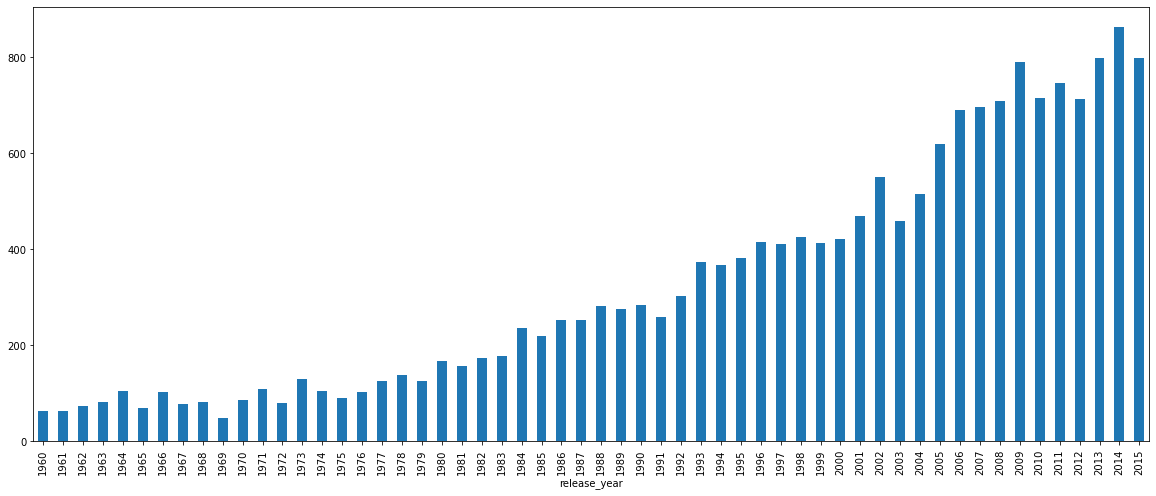

In [46]:
movies_per_year_counts.plot(kind="bar", figsize=(20,8));

There are more and more movies produced over the years. We can confirm that it is a very active domain.

In [47]:
# Let us understand the movie genres production's evolution over the years

In [48]:
# Number of movie genres produced per year
genres_per_year_counts = df.groupby(["release_year","genres"]).count()
genres_per_year_counts

id  imdb_id  popularity  budget  revenue  \
release_year genres                                                       
1960         Action             5        5           5       5        5   
             Adventure          5        5           5       5        5   
             Comedy             7        7           7       7        7   
             Crime              2        2           2       2        2   
             Drama             10       10          10      10       10   
...                           ...      ...         ...     ...      ...   
2015         Science Fiction   54       54          54      54       54   
             TV Movie           6        6           6       6        6   
             Thriller         103      103         103     103      103   
             War                6        6           6       6        6   
             Western            4        4           4       4        4   

                              original_title  cast  director  tagline  \
release_year genres                                                     
1960         Action                        5     5         5        5   
             Adventure                     5     5         5        5   
             Comedy                        7     7         7        7   
             Crime                         2     2         2        2   
             Drama                        10    10        10       10   
...                                      ...   ...       ...      ...   
2015         Science Fiction              54    54        54       54   
             TV Movie                      6     6         6        6   
             Thriller                    103   103       103      103   
             War                           6     6         6        6   
             Western                       4     4         4        4   

                              keywords  overview  runtime  \
release_year genres                                         
1960         Action                  5         5        5   
             Adventure               5         5        5   
             Comedy                  7         7        7   
             Crime                   2         2        2   
             Drama                  10        10       10   
...                                ...       ...      ...   
2015         Science Fiction        54        54       54   
             TV Movie                6         6        6   
             Thriller              103       103      103   
             War                     6         6        6   
             Western                 4         4        4   

                              production_companies  vote_count  vote_average  \
release_year genres                                                            
1960         Action                              5           5             5   
             Adventure                           5           5             5   
             Comedy                              7           7             7   
             Crime                               2           2             2   
             Drama                              10          10            10   
...                                            ...         ...           ...   
2015         Science Fiction                    54          54            54   
             TV Movie                            6           6             6   
             Thriller                          103         103           103   
             War                                 6           6             6   
             Western                             4           4             4   

                              budget_adj  revenue_adj  no_website  
release_year genres                                                
1960         Action                    5            5           5  
             Adventure                 5            5           5 

In [49]:
genres_per_year_counts = genres_per_year_counts.iloc[:,1]
genres_per_year_counts

release_year  genres         
1960          Action               5
              Adventure            5
              Comedy               7
              Crime                2
              Drama               10
                                ... 
2015          Science Fiction     54
              TV Movie             6
              Thriller           103
              War                  6
              Western              4
Name: imdb_id, Length: 1000, dtype: int64

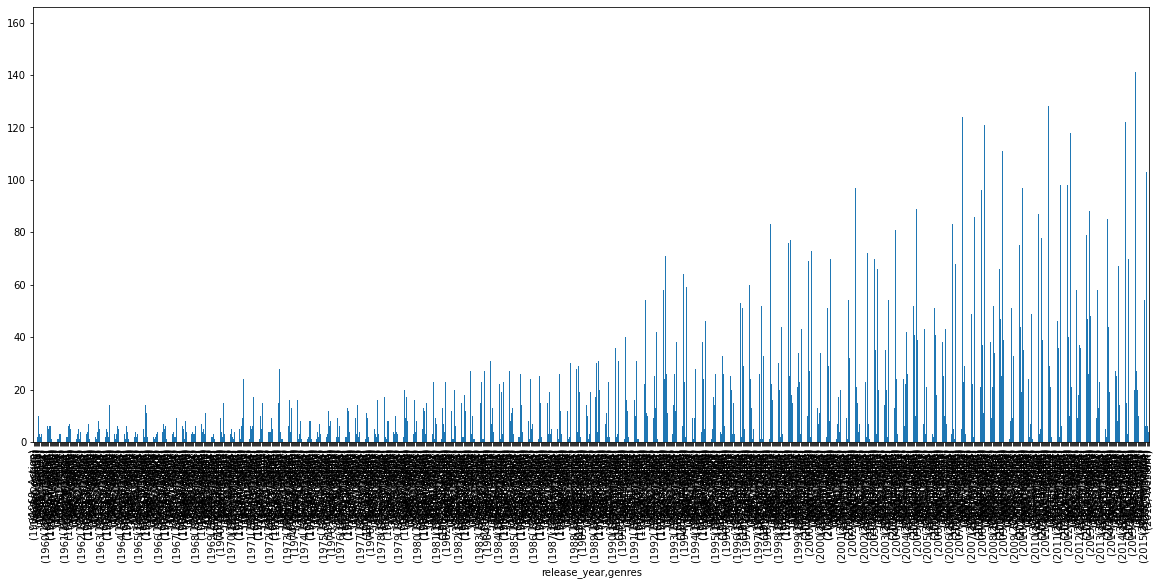

In [50]:
# Ploting the released genres per year for better observation
genres_per_year_counts.plot(kind="bar", figsize=(20,8));

There are too many observations to draw a good conclusion. So we will observe data for the last 3 years.

In [51]:
# year from which to analyze datas
analyze_from = max_year - 3

In [52]:
genres_per_year_counts = df.query(" release_year >= {} ".format(analyze_from)).groupby(["release_year","genres"]).count()
genres_per_year_counts

id  imdb_id  popularity  budget  revenue  \
release_year genres                                                       
2012         Action            73       73          73      73       73   
             Adventure         36       36          36      36       36   
             Animation         24       24          24      24       24   
             Comedy            98       98          98      98       98   
             Crime             40       40          40      40       40   
...                           ...      ...         ...     ...      ...   
2015         Science Fiction   54       54          54      54       54   
             TV Movie           6        6           6       6        6   
             Thriller         103      103         103     103      103   
             War                6        6           6       6        6   
             Western            4        4           4       4        4   

                              original_title  cast  director  tagline  \
release_year genres                                                     
2012         Action                       73    73        73       73   
             Adventure                    36    36        36       36   
             Animation                    24    24        24       24   
             Comedy                       98    98        98       98   
             Crime                        40    40        40       40   
...                                      ...   ...       ...      ...   
2015         Science Fiction              54    54        54       54   
             TV Movie                      6     6         6        6   
             Thriller                    103   103       103      103   
             War                           6     6         6        6   
             Western                       4     4         4        4   

                              keywords  overview  runtime  \
release_year genres                                         
2012         Action                 73        73       73   
             Adventure              36        36       36   
             Animation              24        24       24   
             Comedy                 98        98       98   
             Crime                  40        40       40   
...                                ...       ...      ...   
2015         Science Fiction        54        54       54   
             TV Movie                6         6        6   
             Thriller              103       103      103   
             War                     6         6        6   
             Western                 4         4        4   

                              production_companies  vote_count  vote_average  \
release_year genres                                                            
2012         Action                             73          73            73   
             Adventure                          36          36            36   
             Animation                          24          24            24   
             Comedy                             98          98            98   
             Crime                              40          40            40   
...                                            ...         ...           ...   
2015         Science Fiction                    54          54            54   
             TV Movie                            6           6             6   
             Thriller                          103         103           103   
             War                                 6           6             6   
             Western                             4           4             4   

                              budget_adj  revenue_adj  no_website  
release_year genres                                                
2012         Action                   73           73          73  
             Adventure                36           36          36 

In [53]:
genres_per_year_counts = genres_per_year_counts.iloc[:,1]
genres_per_year_counts

release_year  genres         
2012          Action              73
              Adventure           36
              Animation           24
              Comedy              98
              Crime               40
                                ... 
2015          Science Fiction     54
              TV Movie             6
              Thriller           103
              War                  6
              Western              4
Name: imdb_id, Length: 77, dtype: int64

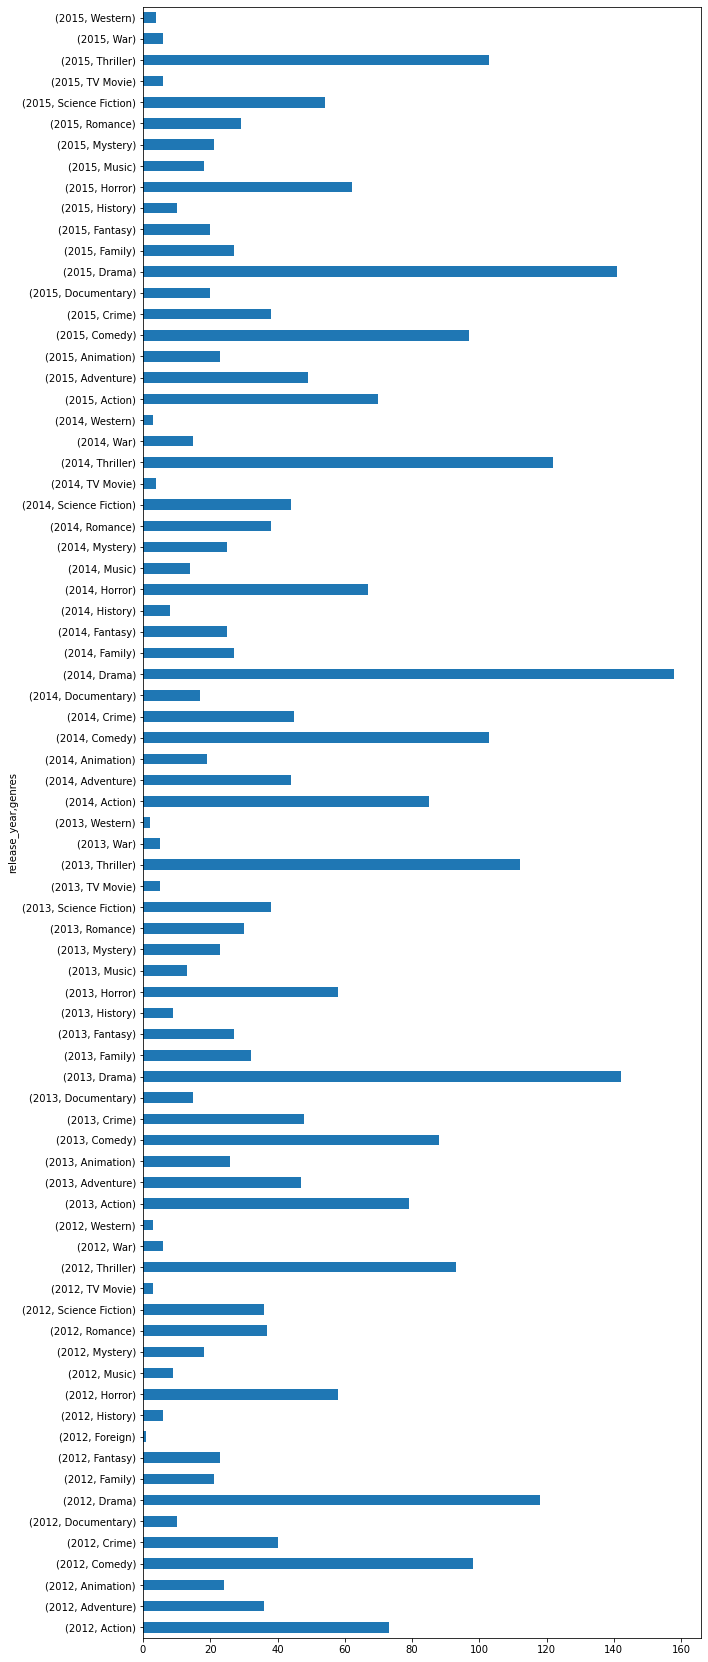

In [54]:
# Ploting the released genres per year for better observation

#genres_per_year_counts.plot(kind="bar", figsize=(40,15));
genres_per_year_counts.plot(kind="barh", figsize=(10,30));

Looking at the chart, we can observe that in recent years, the genres that stand out the most each year are :
* Comedy
* Drama
* Thriller

TODO (improvment) : Let us confirm that by using code to select the 4 most produced movie genres each year.

In [55]:
df["genres"].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [56]:
targeted_genres = ["Comedy","Drama","Thriller"]
targeted_genres

['Comedy', 'Drama', 'Thriller']

Let us observe the evolution of production of our targeted genres over the years.

In [57]:
analyze_from = max_year - 10
analyze_from

2005.0

In [58]:
target_genres_evolution = df.query(" genres in {} &  release_year >= {} ".format(targeted_genres,analyze_from)) \
                                .groupby(["genres","release_year"]) \
                                .count()
target_genres_evolution                             

id  imdb_id  popularity  budget  revenue  \
genres   release_year                                              
Comedy   2005           89       89          89      89       89   
         2006          103      103         103     103      103   
         2007           87       87          87      87       87   
         2008           96       96          96      96       96   
         2009          111      111         111     111      111   
         2010           97       97          97      97       97   
         2011          100      100         100     100      100   
         2012           98       98          98      98       98   
         2013           88       88          88      88       88   
         2014          103      103         103     103      103   
         2015           97       97          97      97       97   
Drama    2005          120      120         120     120      120   
         2006          131      131         131     131      131   
         2007          124      124         124     124      124   
         2008          121      121         121     121      121   
         2009          130      130         130     130      130   
         2010          126      126         126     126      126   
         2011          128      128         128     128      128   
         2012          118      118         118     118      118   
         2013          142      142         142     142      142   
         2014          158      158         158     158      158   
         2015          141      141         141     141      141   
Thriller 2005           71       71          71      71       71   
         2006           83       83          83      83       83   
         2007           86       86          86      86       86   
         2008           74       74          74      74       74   
         2009           98       98          98      98       98   
         2010           87       87          87      87       87   
         2011           98       98          98      98       98   
         2012           93       93          93      93       93   
         2013          112      112         112     112      112   
         2014          122      122         122     122      122   
         2015          103      103         103     103      103   

                       original_title  cast  director  tagline  keywords  \
genres   release_year                                                      
Comedy   2005                      89    89        89       89        89   
         2006                     103   103       103      103       103   
         2007                      87    87        87       87        87   
         2008                      96    96        96       96        96   
         2009                     111   111       111      111       111   
         2010                      97    97        97       97        97   
         2011                     100   100       100      100       100   
         2012                      98    98        98       98        98   
         2013                      88    88        88       88        88   
         2014                     103   103       103      103       103   
         2015                      97    97        97       97        97   
Drama    2005                     120   120       120      120       120   
         2006                     131   131       131      131       131   
         2007                     124   124       124      124       124   
         2008                     121   121       121      121       121   
         2009                     130   130       130      130       130   
         2010                     126   126       126      126       126   
         2011                     128   128       128      128       128   
         2012                     118   118       118      118       118   
         2013                     142   142    

In [59]:
target_genres_evolution = target_genres_evolution.iloc[:,1]
target_genres_evolution

genres    release_year
Comedy    2005             89
          2006            103
          2007             87
          2008             96
          2009            111
          2010             97
          2011            100
          2012             98
          2013             88
          2014            103
          2015             97
Drama     2005            120
          2006            131
          2007            124
          2008            121
          2009            130
          2010            126
          2011            128
          2012            118
          2013            142
          2014            158
          2015            141
Thriller  2005             71
          2006             83
          2007             86
          2008             74
          2009             98
          2010             87
          2011             98
          2012             93
          2013            112
          2014            122
          2015   

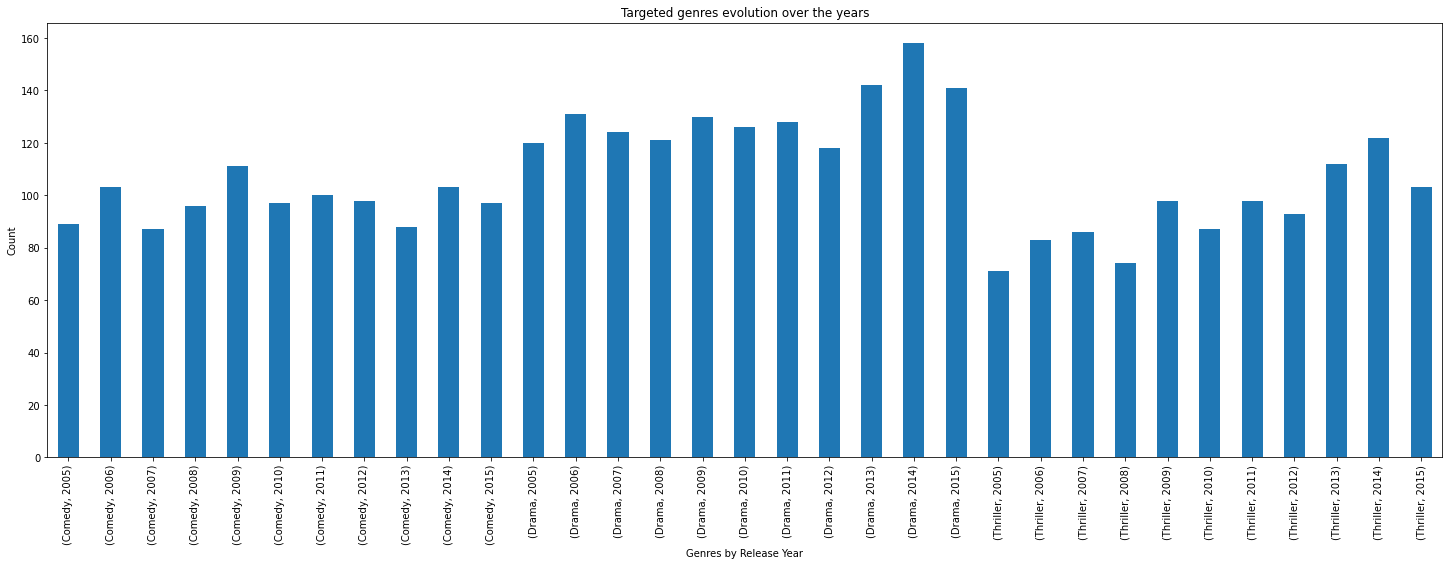

In [60]:
target_genres_evolution.plot(kind="bar",figsize=(25,8));

plt.ylabel("Count")
plt.xlabel("Genres by Release Year")
plt.title("Targeted genres evolution over the years");

TODO : make the color of the bar change for each genre (purple for Comedy, red for Thriller, pink for Drama).    
*Note : Dear Reviewer, please advise me a link/ressource that will teach me how to do this.*

Looking at the chart, we can see that from 2005 to 2015 :
1. The minimum amount of Drama produced is superior to the maximum amount of Comedy and Thriller
2. The production of the Comedy genre has been fluctuating over the years, while the production of Drama appear to be more stable with some slight fluctuations    
3. The production of Thriller started small, then keep going up stably.  
4. Overall, the Drama genre appears to be more produced compared to the other genres.
    
We will later evaluate the revenue of each our targeted genres, in order to confirm which one we will focus on.

In [61]:
# release_and_genres_count = df.groupby(["release_year","genres"]).agg({
#     "id":["count"]
# })
# release_per_year_count

### Between the genres of movies on trend, what is the correlation between them and revenue ?    
We will explore the relationship between each genre and the revenue. The goal is to choose which genre of movie to invest on.

In order to make our work easier, we will drop all genres except those that are of interest to us.

In [62]:
targeted_genres

['Comedy', 'Drama', 'Thriller']

In [63]:
targeted_genres_df = df.query(" genres in {} and release_year >= {}".format(targeted_genres,analyze_from))
targeted_genres_df.head(3).T

,3,7,10
id,135397,76341,262500
imdb_id,tt0369610,tt1392190,tt2908446
popularity,32.985763,28.419936,13.112507
budget,150000000,150000000,110000000
revenue,1513528810,378436354,295238201
original_title,Jurassic World,Mad Max: Fury Road,Insurgent
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
director,Colin Trevorrow,George Miller,Robert Schwentke
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,based on novel|revolution|dystopia|sequel|dyst...


In [64]:
# Looking at how much sample we have
targeted_genres_df.shape

(3535, 20)

In [65]:
# Confirming the genres we have (in order to be sure of not having error)
targeted_genres_df["genres"].unique()

array(['Thriller', 'Drama', 'Comedy'], dtype=object)

In [66]:
# Let us undestand the distribution of the revenue
targeted_genres_df.describe()["revenue"]

count    3.535000e+03
mean     5.439440e+07
std      1.228452e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.455831e+06
75%      5.501962e+07
max      1.513529e+09
Name: revenue, dtype: float64

25% of the produced movies generated no revenue. We should investigate why.

In [67]:
# Retrieving the movies with no revenue in our targeted genres
no_revenue_df = targeted_genres_df.query("revenue==0")
no_revenue_df.head(3).T

,145,147,199
id,265208,265208,334074
imdb_id,tt2231253,tt2231253,tt3247714
popularity,2.93234,2.93234,2.331636
budget,30000000,30000000,20000000
revenue,0,0,0
original_title,Wild Card,Wild Card,Survivor
cast,Jason Statham|Michael Angarano|Milo Ventimigli...,Jason Statham|Michael Angarano|Milo Ventimigli...,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...
director,Simon West,Simon West,James McTeigue
tagline,Never bet against a man with a killer hand.,Never bet against a man with a killer hand.,His Next Target is Now Hunting Him
keywords,gambling|bodyguard|remake,gambling|bodyguard|remake,new year's eve|fire|showdown|terrorist|embassy


In [68]:
# Number of movies with no revenue in our targeted genres
no_revenue_df["id"].nunique()

1034

In [69]:
# Movies with no revenue in our targeted genres
no_revenue_df["original_title"].unique()

array(['Wild Card', 'Survivor', 'Me and Earl and the Dying Girl', ...,
       'Steel Trap', 'Margot at the Wedding', 'Rocket Science'],
      dtype=object)

A quick search over Google on some of those movies show that they have generated revenue as of today. So we can assume that at the time this dataset was compiled, those movies were just released, and thus have yet to be sold. But we will still observe the years over which those movies were release in order to confirm our hypothesis (all of them should be released at 2015, the last year of our dataset).  

In [70]:
# Looking at the release year that 
no_revenue_df["release_year"].unique()

array([2015, 2014, 2009, 2010, 2008, 2011, 2012, 2013, 2005, 2006, 2007],
      dtype=int64)

It is weird that the release years span over 2017 to 2015. But since our search over the net confirmed those movies generated revenues, we can still maintain our assumption there is a reason that explain why they have no revenue in our dataset, i.e. not being put to sale immediatly after being released. So in order to have a clear and comprehensive analysis, we will not consider them in the next stage of work.

In [71]:
targeted_genres_df.shape

(3535, 20)

In [72]:
# Dropping movies with no revenue
targeted_genres_with_revenue_df = targeted_genres_df.drop(no_revenue_df.index, axis=0)
targeted_genres_with_revenue_df.shape

(2166, 20)

In [73]:
# Total revenue generated by each genre in recent years
targeted_genres_with_revenue_df.groupby("genres").sum()["revenue"]

genres
Comedy      70216803556
Drama       63388784059
Thriller    58678601275
Name: revenue, dtype: int64

In [74]:
# Mean revenue geneated by each genre in recent years
targeted_genres_with_revenue_df.groupby("genres").mean()["revenue"]

genres
Comedy      1.035646e+08
Drama       7.035381e+07
Thriller    9.996355e+07
Name: revenue, dtype: float64

Comedy generated more total revenue in recent years than Drama.       
But looking at the mean revenue, we can see that Drama seems a more interesting genre to invest on because of its high revenue.     
As for Thriller, it generated the highest mean revenue.

So far, we can summarize that :
1. The most produced genre is Drama, followed by Comedy then Thriller
2. The genre with the highest mean revenue is Thriller, followed by Drama then Comedy.

From the above two points, we can see that :    
1. Producing Drama movie appears to be a more certain/stable investment :     
    * There are many produced monvies in that category, which show that it interest a great segment of the population.
    * There is a corresponding high revenue for that category.
    * The mean of that category is not far from its sum, which shows that each movie produced its fair amount of revenue.
2. Producing Thriller movie appears to have some constraints :
    * The fact that Thriller genres is the least produced genre shows us that there seems to be more constraints (maybe technicals/financials/time...) in producing those type of movies.
    * It is not easy to produce a Thriller movie, but we are sure that it may generate high revenue if produced successfully.
3. The total amount of Comedy revenue is in the 70 millions, while the mean revenue is in 0.1 million; this means that :
    * There are a great number of Comedy movies which generated too little revenue
    * It is not easy to make a good Comedy that will please the population.
    
        
Looking at those points, we can conclude that producing Drama is a good investment for us. Thriller is also a good choice, although is appear more complicated to be produced.

In [75]:
choosen_genre = "Drama"
choosen_genre

'Drama'

--------------------------------------------------------------
Début Brouillon

In [76]:
targeted_genres_with_revenue_df.groupby("genres").mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,no_website
genres,,,,,,,,,,,
Comedy,70508.632743,1.170967,3.503629e+07,1.035646e+08,100.867257,500.174041,5.994100,2009.886431,3.509038e+07,1.031011e+08,0.426254
Drama,79290.945616,1.154805,2.655364e+07,7.035381e+07,111.910100,510.386238,6.356271,2010.044395,2.661230e+07,7.006363e+07,0.436182
Thriller,73079.170358,1.540744,3.846296e+07,9.996355e+07,107.477002,724.839864,6.009029,2010.098807,3.845320e+07,9.895471e+07,0.437819


In [77]:
targeted_genres_with_revenue_df.groupby("genres").sum()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,no_website
genres,,,,,,,,,,,
Comedy,47804853,793.915487,23754602086,70216803556,68388,339118,4064.0,1362703,2.379128e+10,6.990256e+10,289
Drama,71441142,1040.479478,23924827066,63388784059,100831,459858,5727.0,1811050,2.397768e+10,6.312733e+10,393
Thriller,42897473,904.417002,22577755560,58678601275,63089,425481,3527.3,1179928,2.257203e+10,5.808641e+10,257


In [78]:
targeted_genres_with_revenue_df.groupby("genres")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Comedy,678.0,1.035646e+08,1.512655e+08,10.0,8464157.75,49157145.0,133411268.5,1.156731e+09
Drama,901.0,7.035381e+07,1.203282e+08,10.0,3759582.00,25005257.0,83719388.0,1.081041e+09
Thriller,587.0,9.996355e+07,1.736558e+08,134.0,8347508.50,40492759.0,108328220.5,1.513529e+09


In [79]:
targeted_genres_df.groupby("genres")["revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Comedy,1069.0,6.568457e+07,1.303640e+08,0.0,0.0,6110000.0,78378744.0,1.156731e+09
Drama,1439.0,4.405058e+07,1.011008e+08,0.0,0.0,2054941.0,41552448.5,1.081041e+09
Thriller,1027.0,5.713593e+07,1.402611e+08,0.0,0.0,871279.0,54124643.5,1.513529e+09


In [80]:
#targeted_genres_df.groupby("genres").count()

Fin Brouillon                        

--------------------------------------------------------------

### What is the minimum amount of money to invest in our choosen genre in order to have the highest possible revenue ?

We are trying to understand the minimum amount of money to invest in order to generate high revenue.

In [81]:
choosen_genre

'Drama'

In [82]:
df_drama = targeted_genres_df.query("genres== '{}'".format(choosen_genre))
df_drama.head(3).T

,19,26,43
id,281957,286217,264660
imdb_id,tt1663202,tt3659388,tt0470752
popularity,9.1107,7.6674,6.118847
budget,135000000,108000000,15000000
revenue,532950503,595380321,36869414
original_title,The Revenant,The Martian,Ex Machina
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Ridley Scott,Alex Garland
tagline,"(n. One who has returned, as if from the dead.)",Bring Him Home,There is nothing more human than the will to s...
keywords,father-son relationship|rape|based on novel|mo...,based on novel|mars|nasa|isolation|botanist,dancing|artificial intelligence|helicopter|dis...


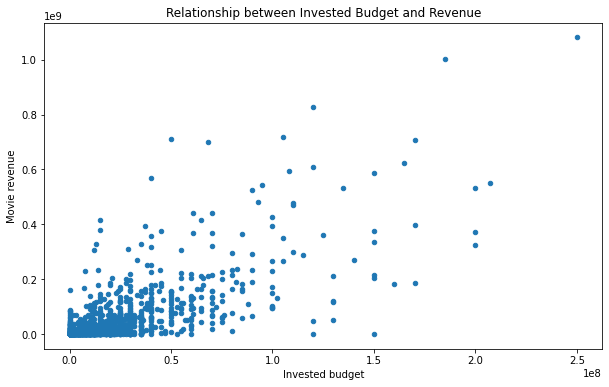

In [83]:
# Let's understand the relationship between budget and revenue
df_drama.plot(x="budget",y="revenue",kind="scatter", figsize=(10,6))

plt.xlabel("Invested budget")
plt.ylabel("Movie revenue")
plt.title("Relationship between Invested Budget and Revenue");

This plot confirm that increasing the movie budget will generate a higher revenue.     

In [84]:
# mean revenue of drama genres
mean_revenue = df_drama.loc[:,"revenue"].mean()
mean_revenue

44050579.610145934

In [91]:
# # mean budget of drama genres
# mean_budget = df_drama.loc[:,"budget"].mean()
# mean_budget

Machine/Deep Learning algorithms and Inferential Statistics technics will allow us to determine which exact amount of budget to invest in order to obtain a given amount of revenue. This is outside the scope of our current analysis, so we will refer to the mean budget invested in Drama genre and use it as the minimum amount of budget required to have a good Drama movie.

-----------------------------------------------------------------------              
Début brouillon

In [86]:
# small revenue drama
df_drama_sr = df_drama[ df_drama["revenue"]<mean_revenue]
df_drama_sr.head(3).T

,43,95,106
id,264660,280996,264644
imdb_id,tt0470752,tt3168230,tt3170832
popularity,6.118847,3.927333,3.557846
budget,15000000,0,6000000
revenue,36869414,29355203,35401758
original_title,Ex Machina,Mr. Holmes,Room
cast,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...
director,Alex Garland,Bill Condon,Lenny Abrahamson
tagline,There is nothing more human than the will to s...,The man behind the myth,Love knows no boundaries
keywords,dancing|artificial intelligence|helicopter|dis...,london|detective|sherlock holmes,based on novel|carpet|isolation|imprisonment|g...


In [87]:
# big revenue drama
df_drama_br = df_drama[ df_drama["revenue"] >= mean_revenue]
df_drama_br.head(3).T

,19,26,52
id,281957,286217,273248
imdb_id,tt1663202,tt3659388,tt3460252
popularity,9.1107,7.6674,5.8984
budget,135000000,108000000,44000000
revenue,532950503,595380321,155760117
original_title,The Revenant,The Martian,The Hateful Eight
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Ridley Scott,Quentin Tarantino
tagline,"(n. One who has returned, as if from the dead.)",Bring Him Home,No one comes up here without a damn good reason.
keywords,father-son relationship|rape|based on novel|mo...,based on novel|mars|nasa|isolation|botanist,bounty hunter|wyoming|mountains|hangman|voice ...


Text(0.5, 1.0, ' Distribution of Drama movies revenue ')

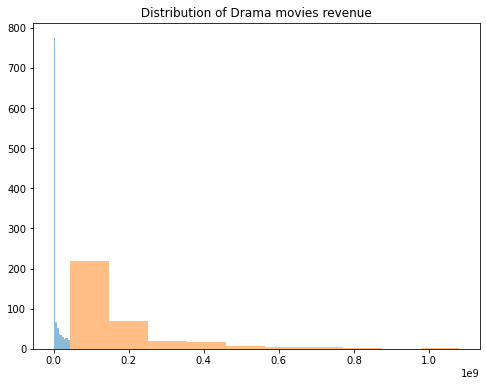

In [88]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist( df_drama_sr["revenue"],alpha=.5, label="Small revenue" )
ax.hist( df_drama_br["revenue"], alpha=.5, label="Higher revenue" )

#ax.set_xlabel("Revenue")
#ax.set_ylabel("")
ax.set_title(" Distribution of Drama movies revenue ")

Fin brouillon                       

-----------------------------------------------------------------------              

### What is the companies that are best at the genre of movie that is of interest to us ?
Our goal here is to choose wich company to choose as the productor of our movie. We will refer to 03 criterias here :
* The total number of Drama movies produced by each company
* The total amount of budget used to produced Drama movies (we can infer from this the level of trust and ability to manage budget each company have) 
* The total amount of revenue generated by each company

We will keep in mind that some companies work together on some movies. So what we are searching for is the company that is related to the most interesting numbers, assuming that the said company will already have its business network to have the job properly done for us.

**Analyzing the number of Drama movies produced by the companies**     
This will help us understand how much active each company is in the Drama genre.

In [92]:
df_drama.head(3).T

,19,26,43
id,281957,286217,264660
imdb_id,tt1663202,tt3659388,tt0470752
popularity,9.1107,7.6674,6.118847
budget,135000000,108000000,15000000
revenue,532950503,595380321,36869414
original_title,The Revenant,The Martian,Ex Machina
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Ridley Scott,Alex Garland
tagline,"(n. One who has returned, as if from the dead.)",Bring Him Home,There is nothing more human than the will to s...
keywords,father-son relationship|rape|based on novel|mo...,based on novel|mars|nasa|isolation|botanist,dancing|artificial intelligence|helicopter|dis...


We will need to remove the pipes from `production_companies` feature in order to make our analysis.

In [93]:
# Shape before pipes removal
df_drama.shape

(1439, 20)

In [94]:
# Removal of pipes in production_companies
to_unpipes =["production_companies"]  #["cast","keywords","genres","production_companies"]

df_drama = unpipe_features(df=df_drama, features=to_unpipes, separator="|")
df_drama.head(3).T

****************************************************************************************************
Working on feature : production_companies 
Shape of dataset before processing : (1439, 20)
................................................................
Processing row index : 19 
------------------------------------------
Processing row index : 26 
------------------------------------------
Processing row index : 43 
------------------------------------------
Processing row index : 52 
------------------------------------------
Processing row index : 64 
------------------------------------------
Processing row index : 74 
------------------------------------------
Processing row index : 76 
------------------------------------------
Processing row index : 78 
------------------------------------------
Processing row index : 81 
------------------------------------------
Processing row index : 88 
------------------------------------------
Processing row index : 95 
----------------

<ipython-input-3-015c2b04d71f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[feature]



------------------------------------------
Processing row index : 324 
------------------------------------------
Processing row index : 330 
------------------------------------------
Processing row index : 337 
------------------------------------------
Processing row index : 344 
------------------------------------------
Processing row index : 347 
------------------------------------------
Processing row index : 351 
------------------------------------------
Processing row index : 352 
------------------------------------------
Processing row index : 356 
------------------------------------------
Processing row index : 361 
------------------------------------------
Processing row index : 365 
------------------------------------------
Processing row index : 366 
------------------------------------------
Processing row index : 367 
------------------------------------------
Processing row index : 376 
------------------------------------------
Processing row index : 379 
-----

Processing row index : 1387 
------------------------------------------
Processing row index : 1389 
------------------------------------------
Processing row index : 1392 
------------------------------------------
Processing row index : 1398 
------------------------------------------
Processing row index : 1409 
------------------------------------------
Processing row index : 1413 
------------------------------------------
Processing row index : 1416 
------------------------------------------
Processing row index : 1420 
------------------------------------------
Processing row index : 1433 
------------------------------------------
Processing row index : 1434 
------------------------------------------
Processing row index : 1436 
------------------------------------------
Processing row index : 1440 
------------------------------------------
Processing row index : 1446 
------------------------------------------
Processing row index : 1448 
-----------------------------------

------------------------------------------
Processing row index : 2694 
------------------------------------------
Processing row index : 2698 
------------------------------------------
Processing row index : 2716 
------------------------------------------
Processing row index : 2718 
------------------------------------------
Processing row index : 2720 
------------------------------------------
Processing row index : 2723 
------------------------------------------
Processing row index : 2730 
------------------------------------------
Processing row index : 2736 
------------------------------------------
Processing row index : 2737 
------------------------------------------
Processing row index : 2744 
------------------------------------------
Processing row index : 2749 
------------------------------------------
Processing row index : 2752 
------------------------------------------
Processing row index : 2753 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 4425 
------------------------------------------
Processing row index : 4429 
------------------------------------------
Processing row index : 4433 
------------------------------------------
Processing row index : 4443 
------------------------------------------
Processing row index : 4444 
------------------------------------------
Processing row index : 4447 
------------------------------------------
Processing row index : 4454 
------------------------------------------
Processing row index : 4463 
------------------------------------------
Processing row index : 4475 
------------------------------------------
Processing row index : 4484 
------------------------------------------
Processing row index : 4488 
------------------------------------------
Processing row index : 4500 
------------------------------------------
Processing row index : 4506 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 5483 
------------------------------------------
Processing row index : 5490 
------------------------------------------
Processing row index : 5491 
------------------------------------------
Processing row index : 5500 
------------------------------------------
Processing row index : 5505 
------------------------------------------
Processing row index : 5509 
------------------------------------------
Processing row index : 5511 
------------------------------------------
Processing row index : 5518 
------------------------------------------
Processing row index : 5519 
------------------------------------------
Processing row index : 5525 
------------------------------------------
Processing row index : 5527 
------------------------------------------
Processing row index : 5528 
------------------------------------------
Processing row index : 5534 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 8438 
------------------------------------------
Processing row index : 8445 
------------------------------------------
Processing row index : 8450 
------------------------------------------
Processing row index : 8452 
------------------------------------------
Processing row index : 8455 
------------------------------------------
Processing row index : 8460 
------------------------------------------
Processing row index : 8462 
------------------------------------------
Processing row index : 8463 
------------------------------------------
Processing row index : 8464 
------------------------------------------
Processing row index : 8468 
------------------------------------------
Processing row index : 8470 
------------------------------------------
Processing row index : 8482 
------------------------------------------
Processing row index : 8490 
------------------------------------------
Processing row index 

------------------------------------------
Processing row index : 9612 
------------------------------------------
Processing row index : 9622 
------------------------------------------
Processing row index : 9627 
------------------------------------------
Processing row index : 9635 
------------------------------------------
Processing row index : 9638 
------------------------------------------
Processing row index : 9642 
------------------------------------------
Processing row index : 9646 
------------------------------------------
Processing row index : 9649 
------------------------------------------
Processing row index : 9652 
------------------------------------------
Processing row index : 9655 
------------------------------------------
Processing row index : 9659 
------------------------------------------
Processing row index : 9663 
------------------------------------------
Processing row index : 9668 
------------------------------------------
Processing row index 

Processing row index : 11694 
------------------------------------------
Processing row index : 11699 
------------------------------------------
Processing row index : 11701 
------------------------------------------
Processing row index : 11702 
------------------------------------------
Processing row index : 11705 
------------------------------------------
Processing row index : 11708 
------------------------------------------
Processing row index : 11715 
------------------------------------------
Processing row index : 11716 
------------------------------------------
Processing row index : 11720 
------------------------------------------
Processing row index : 11723 
------------------------------------------
Processing row index : 11725 
------------------------------------------
Processing row index : 11729 
------------------------------------------
Processing row index : 11732 
------------------------------------------
Processing row index : 11737 
---------------------

,0,1,2
id,281957,281957,281957
imdb_id,tt1663202,tt1663202,tt1663202
popularity,9.1107,9.1107,9.1107
budget,135000000,135000000,135000000
revenue,532950503,532950503,532950503
original_title,The Revenant,The Revenant,The Revenant
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
tagline,"(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)"
keywords,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...


In [96]:
df_drama.head(3).T

,0,1,2
id,281957,281957,281957
imdb_id,tt1663202,tt1663202,tt1663202
popularity,9.1107,9.1107,9.1107
budget,135000000,135000000,135000000
revenue,532950503,532950503,532950503
original_title,The Revenant,The Revenant,The Revenant
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
tagline,"(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)"
keywords,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...


In [95]:
# Shape afeter pipes removal
df_drama.shape

(4323, 20)

In [99]:
# Let us take a look at the list of production companies
df_drama["production_companies"].unique()

array(['Regency Enterprises', 'Appian Way', 'CatchPlay', ...,
       'W B I Films', 'Rocket Science Inc.', 'Duly Noted'], dtype=object)

In [100]:
# Let us see the number of production companies we have
df_drama["production_companies"].nunique()

2143

In [105]:
# Total number of Drama movies produced by each company
productions_count = df_drama.groupby(["production_companies"]).count().loc[:,"imdb_id"]
productions_count

production_companies
1019 Entertainment                   1
10th Hole Productions                1
11:11 Mediaworks                     1
1492 Pictures                        2
185 Trax                             1
                                    ..
Zweites Deutsches Fernsehen (ZDF)    1
amber entertainment                  1
iDeal Partners Film Fund             3
icon                                 1
uFilm                                2
Name: imdb_id, Length: 2143, dtype: int64

In [107]:
# Let us see the scope of movies production count, to understand the gap between the best and worst companies
min(productions_count), max(productions_count)

(1, 62)

In [110]:
# Taking a look at the distribution of movies production count, to have a better understanding of the repartition of 
#  the companies activities
productions_count.describe()

count    2143.000000
mean        2.017266
std         3.409793
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        62.000000
Name: imdb_id, dtype: float64

We can see that there is a large gap between the companies. It made wondering if our database is uptodate and if we should go back and recollect datas.     
For this report, we will assume that the large difference in productivity is related to the fact that the majority of companies produce other genres of movie apart from Drama, while the rest focus on producing Drama movie. We will limit our choices to the companies which focus/specialize on Drama genre.

In [112]:
# Getting the mean of Drama genre production count, so that we us it as reference to select the best companies
mean_produced_dramas = productions_count.mean()
mean_produced_dramas

2.017265515632291

In [115]:
# Total number of Drama movies produced by each of the best companies
productions_count = df_drama.groupby(["production_companies"]).count() \
                            .query("imdb_id > {}".format(mean_produced_dramas))\
                            .loc[:,"imdb_id"]
productions_count

production_companies
1984 Private Defense Contractors     3
20th Century Fox                     7
21 Laps Entertainment                3
2929 Productions                    10
3 Arts Entertainment                 4
                                    ..
Yari Film Group                      5
Yucaipa Films                        3
Zentropa Entertainments              8
Zephyr Films                         4
iDeal Partners Film Fund             3
Name: imdb_id, Length: 334, dtype: int64

<AxesSubplot:xlabel='production_companies'>

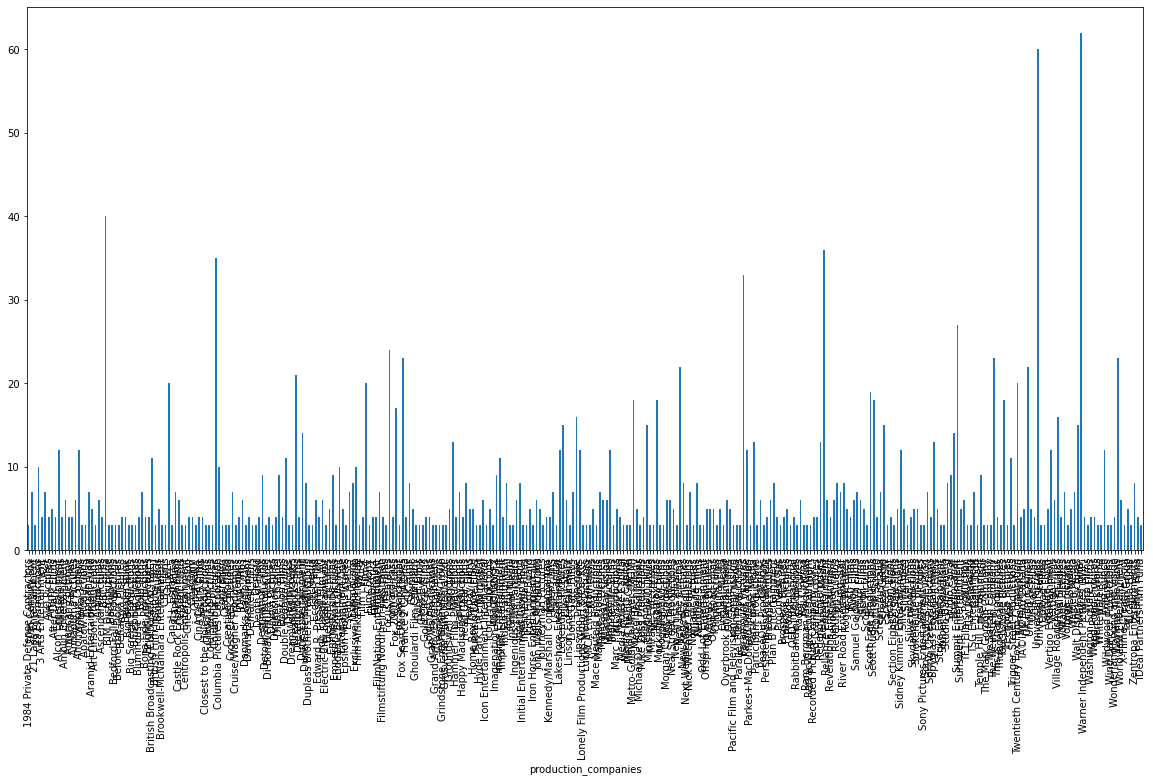

In [116]:
# Let us plot the total number of Drama movies, to help ourselves through somes visualization
productions_count.plot(kind="bar",figsize=(20,10))

Our chart is too crowded to obtain useful informations. But we can still observe that :
* There are many companies that match our criteria.
* Many companies have produced over 20 movies.

So we will use 20 as a reference to select the best companies for us.

In [117]:
# Minimum number a company has to have produced in order to be considered
min_productions_count = 20

In [119]:
# Total number of Drama movies produced by each of the best companies
productions_count = df_drama.groupby(["production_companies"]).count() \
                            .query("imdb_id > {}".format(min_productions_count))\
                            .loc[:,"imdb_id"]
productions_count

production_companies
BBC Films                   40
Columbia Pictures           35
DreamWorks SKG              21
Focus Features              24
Fox Searchlight Pictures    23
New Line Cinema             22
Paramount Pictures          33
Relativity Media            36
Summit Entertainment        27
The Weinstein Company       23
UK Film Council             22
Universal Pictures          60
Warner Bros.                62
Working Title Films         23
Name: imdb_id, dtype: int64

This reduced list is much more better for us. We will help ourself by a chart to compare the companies activities.

In [128]:
# Ordering the production count in descending order
productions_count = productions_count.sort_values(ascending=False)
productions_count

production_companies
Warner Bros.                62
Universal Pictures          60
BBC Films                   40
Relativity Media            36
Columbia Pictures           35
Paramount Pictures          33
Summit Entertainment        27
Focus Features              24
Fox Searchlight Pictures    23
The Weinstein Company       23
Working Title Films         23
New Line Cinema             22
UK Film Council             22
DreamWorks SKG              21
Name: imdb_id, dtype: int64

In [129]:
productions_count

production_companies
Warner Bros.                62
Universal Pictures          60
BBC Films                   40
Relativity Media            36
Columbia Pictures           35
Paramount Pictures          33
Summit Entertainment        27
Focus Features              24
Fox Searchlight Pictures    23
The Weinstein Company       23
Working Title Films         23
New Line Cinema             22
UK Film Council             22
DreamWorks SKG              21
Name: imdb_id, dtype: int64

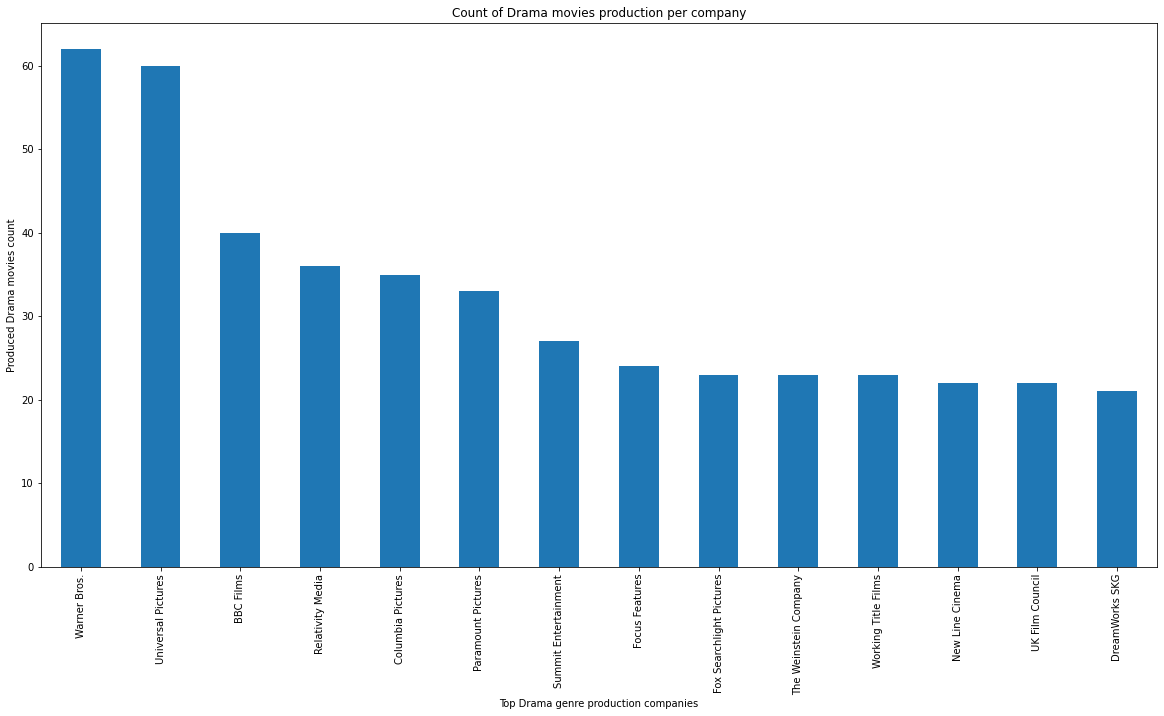

In [130]:
# Plot the total number of Drama movies produced by each of the best companies
productions_count.plot(kind="bar",figsize=(20,10))

plt.xlabel("Top Drama genre production companies")
plt.ylabel("Produced Drama movies count")
plt.title("Count of Drama movies production per company");

Two companies catch our attention : 
1. Warner Bros
1. Universal Pictures

We can still consider the next 3 best companies, since the number of Drama movies produced is not our only choosing criteria :
1. BBC Films
1. Relativity Media
1. Columbia Pictures
1. Paramount Pictures                       

We are adding `Paramount Pictures` because its values is close to `Columbia Pictures`, so other factors may bring us later to prefer it.

**Analyzing the total amount of budget used to produced Drama movies**     

(we can infer from this the level of trust and ability to manage budget each company have)

This will help us infer :
* The standard of movie each company work on, assuming that the better the standard, the higher the needed budget
* How much the clients trust each company, because the higher the trust, the higher the amount of money one is willing to entrust

In [131]:
df_drama.head(3).T

,0,1,2
id,281957,281957,281957
imdb_id,tt1663202,tt1663202,tt1663202
popularity,9.1107,9.1107,9.1107
budget,135000000,135000000,135000000
revenue,532950503,532950503,532950503
original_title,The Revenant,The Revenant,The Revenant
cast,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
tagline,"(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)","(n. One who has returned, as if from the dead.)"
keywords,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...,father-son relationship|rape|based on novel|mo...


In [132]:
# Total number of Drama movies produced by each company
budgets_sum = df_drama.groupby(["production_companies"]).sum().loc[:,"budget"]
budgets_sum

production_companies
1019 Entertainment                    2000000
10th Hole Productions                 4000000
11:11 Mediaworks                     25000000
1492 Pictures                        65000000
185 Trax                              4200000
                                       ...   
Zweites Deutsches Fernsehen (ZDF)    20000000
amber entertainment                         0
iDeal Partners Film Fund              4000000
icon                                  8000000
uFilm                                15000000
Name: budget, Length: 2143, dtype: int64

In [ ]:
# Total number of Drama movies produced by each company
#df_drama.groupby("pro")

In [90]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Does having a website for the genre that is of interest to us help improve revenue ?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!